In [1]:
import pandas as pd
from scipy.stats import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyspark.sql.types import IntegerType, FloatType ,DateType
from pyspark.sql import SparkSession
import findspark
import pyspark.sql.functions as F
from pyspark.sql.functions import *
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
findspark.init()
findspark.find()

'C:\\Spark\\spark-3.0.3-bin-hadoop2.7'

In [3]:
spark = SparkSession \
    .builder \
    .appName("Hypothesis ") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Read data

In [4]:
df = spark.read.csv(".\data\practive pyspark.csv", header =True)
df.printSchema()

root
 |-- Code: string (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: string (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: string (nullable = true)
 |-- know_france: string (nullable = true)
 |-- know_chinese: string (nullable = true)
 |-- income: string (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: string (nullable = true)
 |-- professionally_staff: string (nullable = true)
 |-- customer_service : string (nullable = true)
 |-- diversity_product: string (nullable = true)
 |-- good_price: string (nullable = true)
 |-- easily_transaction: string (nullable = true)
 |-- goodlooking_staff: string (nullable = true)
 |-- diversity_flighttime: string (nullable = true)
 |-- good_construction: string (nullable = tru

# preprocessing data

In [5]:
#Convering str to numberic
df = df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(IntegerType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(IntegerType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))
df.printSchema()

root
 |-- Code: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: integer (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: integer (nullable = true)
 |-- know_france: integer (nullable = true)
 |-- know_chinese: integer (nullable = true)
 |-- income: integer (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: integer (nullable = true)
 |-- professionally_staff: integer (nullable = true)
 |-- customer_service : integer (nullable = true)
 |-- diversity_product: integer (nullable = true)
 |-- good_price: integer (nullable = true)
 |-- easily_transaction: integer (nullable = true)
 |-- goodlooking_staff: integer (nullable = true)
 |-- diversity_flighttime: integer (nullable = true)
 |-- good_construction: integer

In [6]:
data = df.toPandas()

# 1. Giả sử thu nhập của kh có độ lệch chuẩn là 5000, với alpha=0.05, có thể kết luận thu nhập trung bình của kh là 14000 hay không?


- H0 : mu # 14000
- H1 : mu = 14000

In [7]:
z_score = (-14000+data.income.mean())/(5000/np.sqrt(len(data.income)))
z_score

-0.6277984453628374

p_value = 1-0.4480 = 0.552> 0.05 . Vậy Fail to reject H0. 
-  95% thu nhập  trung bình  # 14000

# 2 Có kết luận cho rằng thu nhập trung bình của nam cao hơn nữ 5000, đúng hay sai? biết aplpha = 0.05, độ lệch chuẩn thu nhập của nam và nữ lần lượt là 7000 và 5000.

Hypotheses

- mu1 : Thu nhập trung bình của nam
- mu2 : Thu nhập trung bình của nữ
- H0 : mu1 - mu2 =< 0
- H1 : m1 - mu2 > 0

test statistic

In [8]:
n2 = len(data[data.gender == 'female'])
n1 = len(data[data.gender == 'male'])
mean_1 = data[data.gender == 'male']['income'].mean()
mean_2  =data[data.gender == 'female']['income'].mean()
sigma1_square = 7000*7000
sigma2_square = 5000*5000

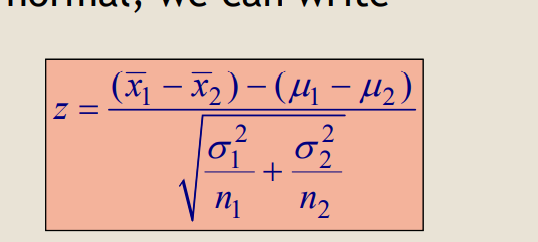

In [9]:
z_score = (mean_1-mean_2)/np.sqrt((sigma1_square/n1)+(sigma2_square/n2))
z_score

11.858532354212112

z_0.05 = 1.645 < z_sccore . Do not reject H0. Vậy không đủ bằng chứng để kết luận thu nhập của nam cao hơn của nữ

# 3 với alpha = 0.05, trung bình thu nhập của kh là 13000 đúng hay sai? (chưa biết phương sai)

- H0: mu = 13000
- H1: mu1 # 13000

In [10]:
tset, pval = ttest_1samp (data.income, 13000)
print ('giá trị p', pval)
if pval <0.05:  # alpha là 0,05 hoặc 5% 
    print (" bác bỏ giả thuyết Ho") 
else: 
    print ("Chấp nhận giả thuyết Ho")

giá trị p 0.007373867945841888
 bác bỏ giả thuyết Ho


p_value <0.05 vậy ta có thể kết luận là trung thu nhập của khách hàng khác 13000

# 4 với alpha = 0.05, thu nhập tb của kh nam bằng thu nhập tb của kh nữ đúng hay sai? (chưa biết phương sai)

- Ho : mu1 = mu2
- H1: mu1 # mu2

In [11]:
tset, pval = stats.ttest_ind(data[data.gender == 'female']['income'], data[data.gender =='male']['income'])
print ('giá trị p', pval)
if pval <0.05:  # alpha là 0,05 hoặc 5% 
    print (" bác bỏ giả thuyết Ho") 
else: 
    print ("Chấp nhận giả thuyết Ho")

giá trị p 8.758653500007178e-26
 bác bỏ giả thuyết Ho


Với p vlue < 0.05 ,ta có thể kết luận rằng thu nhập trung bình của khách hàng nam khác thu nhập trung bình của khách hàng nữ

# 5 Liệu có mối quan hệ giữa 2 biến age_group và degree hay không? kiểm định điều đó

- H0: Không tương quan
- H1: Tương quan

In [12]:
d = pd.pivot_table(data,index = 'age_group', columns = 'degree', values  ='Code',\
                   aggfunc=pd.Series.nunique, margins = True).fillna(0)
d

degree,bachelor,highshool,master,All
age_group,,,,
elder,17.0,81.0,1.0,99
middle,102.0,138.0,113.0,353
youth,10.0,38.0,0.0,48
All,129.0,257.0,114.0,500


In [13]:
chi2, p, dof, ex = chi2_contingency(d, correction=False)

In [14]:
alpha = 0.05
if p > alpha:
    print('Không tươgn quan (fail to reject H0) p=%.3f' % p)
else:
    print('tương quan (reject H0) p=%.3f' % p)

tương quan (reject H0) p=0.000


Vậy hai biến có mối quan hệ với nhau

# 6 Số kh làm officer bằng số kh làm sale và gấp 5 lần số kh làm manager đúng hay sai?

- Ho: officer = sale, officer = 5 manager
- H1: Không bằng

In [15]:
data.job.value_counts()

officer    239
sale       217
manager     44
Name: job, dtype: int64

# 7 Kiểm định phân phối của biến age xem có đúng là pp chuẩn hay ko?

In [19]:
H0=  'tuân theo phân phôi chuẩn'
H1= 'không tuân theo Phân phối chuẩn'

In [20]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data.age)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(H0)
else:
    print(H1)

stat=0.867, p=0.000
không tuân theo Phân phối chuẩn
